#keyword:  Sobel filter using scipy
https://stackoverflow.com/questions/7185655/applying-the-sobel-filter-using-scipy

In [ ]:
#source https://blancosilva.wordpress.com/teaching/mathematical-imaging/denoising-wavelet-thresholding/

In [59]:
!ls ../images

cat.jpg     fishlocal.png  iPhone2.jpg	peru.jpeg     Samsung2.jpg  sobel.jpg
digit8.png  iPhone1.jpg    lena.png	Samsung1.jpg  scene.jpg


In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = '../images/iPhone1.jpg'
img = cv2.imread(img_path)

In [97]:
import cv2
from scipy.signal import convolve2d
from scipy.ndimage import uniform_filter1d, convolve,median_filter,minimum_filter,maximum_filter,\
rank_filter,prewitt
import pywt

def gaussian_f(img,k,sd):
    x = cv2.getGaussianKernel(k,sd)
    kernel = x*x.T
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = convolve2d(img[:,:,i], kernel, boundary='symm', mode='same')
    return res-img

def convolve_f(img,k):
    kernel = np.ones((k,k))
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = convolve(img[:,:,i], kernel,mode='nearest')
    return res-img
def uniform_f(img,k):
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = uniform_filter1d(img[:,:,i], k)
    return res-img

def median_f(img,k):
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = median_filter(img[:,:,i], k)
    return res-img

def minimum_f(img,k):
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = minimum_filter(img[:,:,i],size = k)
    return res-img

def rank_f(img,k):
    res = np.copy(img)
    for i in range(3):
        res[:,:,i] = rank_filter(img[:,:,i],rank = 1,size= k)
    return res-img


def wavelet_f(img):
    res = []
    for i in range(3):
        res.append(pywt.dwt2(img[:,:,i], 'haar')[1][0])

    return np.array(res).transpose((1,2,0))


?median_filter

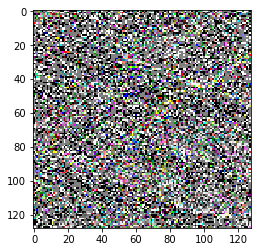

In [98]:
f1 = wavelet_f(img)
plt.imshow(f1)
plt.show()

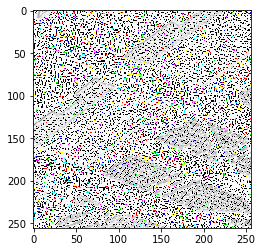

In [99]:
f1 = rank_f(img,3)
plt.imshow(f1)
plt.show()

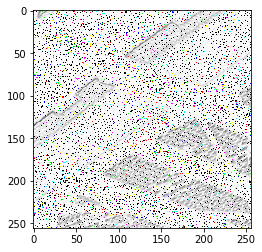

In [100]:
f1 = minimum_f(img,3)
plt.imshow(f1)
plt.show()

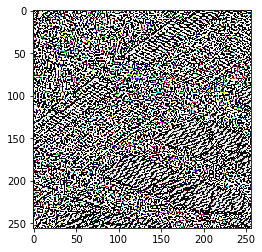

In [101]:
f1 = gaussian_f(img,3,10)
plt.imshow(f1)
plt.show()

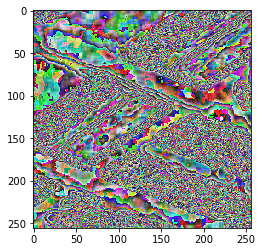

In [107]:
f1 = convolve_f(img,9)
plt.imshow(f1)
plt.show()

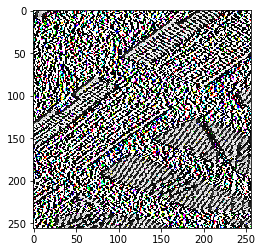

In [108]:
f1 = uniform_f(img,7)
plt.imshow(f1)
plt.show()


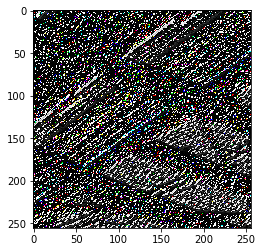

In [104]:
f1 = median_f(img,2)
plt.imshow(f1)
plt.show()

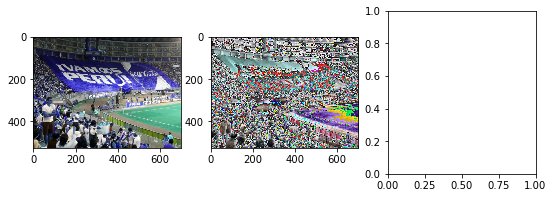

In [134]:
klen = 5
kernel = np.ones(klen)

import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d, convolve1d
fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(img)


z1 = convolve1d(img[:,:,:], kernel)
axs[1].imshow(z1)
plt.show()

In [9]:
kernel = np.array([[-1,2,-2,2,-1], [2,-6,8,-6,2], [-2,8,-12,8,-2],[2,-6,8,-6,2],[-1,2,-2,2,-1]])/12

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
kernel = x*x.T

In [33]:
kernel.shape

(5, 5)

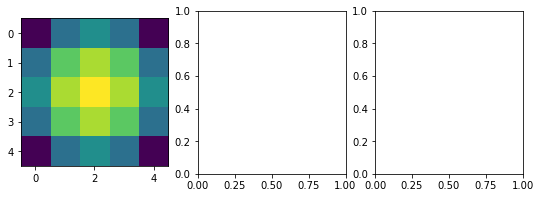

In [34]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(kernel)
plt.show()

In [35]:
from scipy.signal import convolve2d
grad = convolve2d(img[:,:,2], kernel, boundary='symm', mode='same')

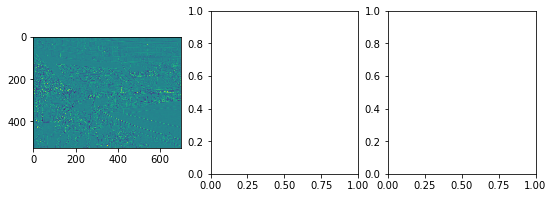

In [43]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(img[:,:,2] - grad)
plt.show()

In [62]:
np.ones((4,4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

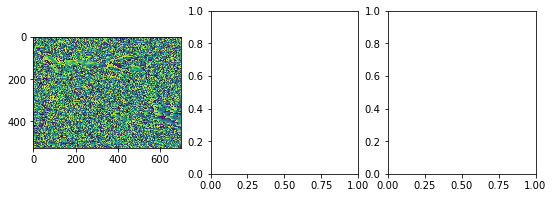

In [63]:

z2 = uniform_filter1d(img[:,:,1], klen)

z2 = convolve(img[:,:,1], kernel, mode='reflect')

fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(img[:,:,1]- z2)
plt.show()

In [59]:
z2 = convolve(img[:,:,1], kernel, mode='reflect')

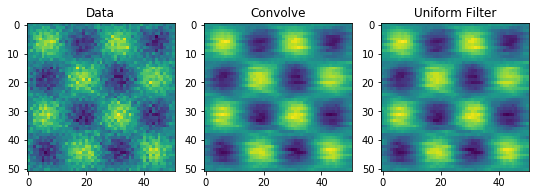

In [52]:
import numpy as np
from scipy.ndimage import uniform_filter1d, convolve1d,convolve 

x, y = np.mgrid[-2*np.pi:2*np.pi:51j, -2*np.pi:2*np.pi:51j]
z = np.sin(x)*np.sin(y) + np.random.randn(51, 51)/5

klen = 5
kernel = np.ones(klen)



z1 = convolve1d(z, kernel)
z2 = uniform_filter1d(z, klen)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(z)
axs[0].set_title('Data')
axs[1].imshow(z1)
axs[1].set_title('Convolve')
axs[2].imshow(z2)
axs[2].set_title('Uniform Filter')

plt.show()

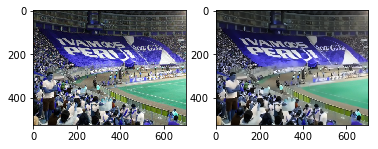

In [37]:

img_path = '../images/peru.jpeg'


import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(img_path)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()


In [38]:
noise = np.subtract(img,dst)

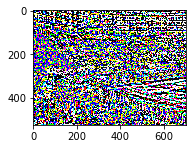

In [39]:
plt.subplot(122),plt.imshow(noise)
plt.show()